# 1. Prepare Environment

## 1.1 Import libraries

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pyo
from pandasql import sqldf

## 1.2 Create useful functions

In [5]:
def plot_data(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['time'], df['today'], label='Today Sales', marker='o')
    plt.plot(df['time'], df['yesterday'], label='Yesterday Sales', marker='s')
    plt.plot(df['time'], df['avg_last_week'], label='Average Sales Last Week', \
             marker='d')
    plt.plot(df['time'], df['avg_last_month'], label='Average Sales Last Month', \
             marker='D')
    plt.xlabel('Hour')
    plt.ylabel('Sales')
    plt.title('Hourly Sales Comparison')
    plt.legend()
    plt.show()

def plot_transactions(df):
  plt.figure(figsize=(12, 6))
  plt.plot(df['time'], df['status'], label='Today Sales', marker='o')
  plt.plot(df['time'], df['yesterday'], label='Yesterday Sales', marker='s')
  plt.plot(df['time'], df['avg_last_week'], label='Average Sales Last Week', marker='d')
  plt.plot(df['time'], df['avg_last_month'], label='Average Sales Last Month', marker='D')
  plt.xlabel('Hour')
  plt.ylabel('Sales')
  plt.title('Hourly Sales Comparison')
  plt.legend()
  plt.show()

## 1.3 Load Data

In [2]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/thais-menezes/monitoring/main/checkout_1.csv')
df_1 # checkout_1.csv

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
0,00h,9,12,11,6.42,4.85
1,01h,3,5,1,1.85,1.92
2,02h,1,0,0,0.28,0.82
3,03h,1,0,0,0.42,0.46
4,04h,0,0,1,0.42,0.21
5,05h,1,1,2,1.28,0.75
6,06h,1,1,5,2.85,2.28
7,07h,2,3,9,5.57,5.21
8,08h,0,1,18,8.71,10.42
9,09h,2,9,30,20.00,19.07


In [3]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/thais-menezes/monitoring/main/checkout_2.csv')
df_2 # checkout_2.csv

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
0,00h,6,9,5,5.000,4.92
1,01h,3,3,2,2.000,1.92
2,02h,3,1,2,0.420,0.75
3,03h,0,1,1,0.420,0.46
4,04h,0,0,0,0.140,0.21
5,05h,2,1,1,0.710,0.71
6,06h,3,1,2,1.420,2.10
7,07h,10,2,9,3.000,5.03
8,08h,25,0,12,3.710,9.82
9,09h,36,2,27,10.140,17.64


# 2. Explore Data

## 2.1. Plot sales over time

### 2.1.1. Checkout 1 (df_1)

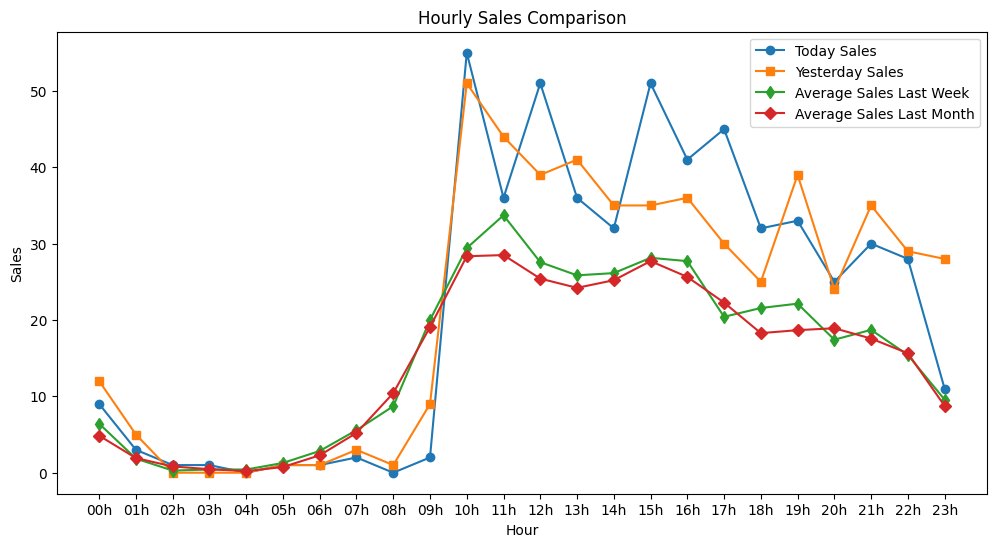

In [8]:
plot_data(df_1)

### 2.1.2. Checkout 2 (df_2)

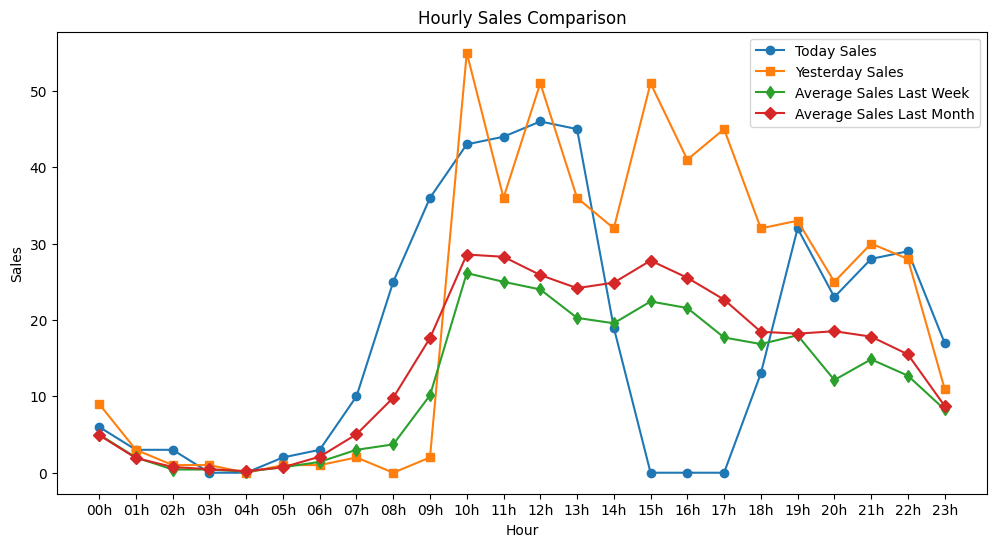

In [9]:
plot_data(df_2)

## 2.2 Query to get anomalies

In [15]:
pysqldf = lambda q: sqldf(q, globals())
print(pysqldf("""select * 
from df_2 
where 1=1
    and today = 0 
    and abs(today - yesterday) > same_day_last_week;"""
    ))

  time  today  yesterday  same_day_last_week  avg_last_week  avg_last_month
0  15h      0         51                  42         22.427           27.78
1  16h      0         41                  36         21.570           25.53
2  17h      0         45                  19         17.710           22.67


# 3. Conclusions
## 3.1. The Anomaly
Based on the provided CSV data and your observation, the sales between 15h and 17h have dropped to 0 today, which is an anomaly. Historical data from yesterday, the same day last week, and the averages of the last week and month show that sales during these hours are typically around 50.
This anomaly could be due to several reasons, including but not limited to:

- Technical Issues: There might have been a system outage or technical glitch preventing sales from being recorded during these hours.
- Operational Issues: The point-of-sale system or physical store could have been temporarily closed due to maintenance or other unforeseen circumstances.
- External Factors: Events such as power outages, internet connectivity issues, or even external disruptions like weather conditions or local events could have impacted sales.

## 3.2. Sales today and yesterday
In addition, today and yesterday appear to correspond to a special event, such as Black Friday, as sales volumes are significantly higher than the recent historical average.

# 3.3. Further Insights
To gain deeper insights and make predictions based on the sales data, several statistical techniques can be employed, listed below.
While the above statistical techniques are powerful tools for gaining insights and making predictions, it's important to note that this analysis was conducted on hypothetical data. Therefore, we did not perform any actual statistical computations. In a real-world scenario, applying these techniques to genuine sales data would provide actionable insights and help in making informed business decisions.
